In [1]:
name = "Daniel Larva"
id = 2511908

In [2]:
# Select the data file based on your student ID
n = id % 5 # Take the modulo 5 of your student ID
num_list = [3, 4, 6, 8, 9] # List of numbers to select from
filename = f'./data/bidmc_{num_list[n]:02d}_Signals.csv'
print(f'Filename: {filename}')

Filename: ./data/bidmc_08_Signals.csv


In [3]:
# Run if needed
#%pip install numpy pandas matplotlib scipy

In [4]:
# Read necessary libraries and functions
import numpy as np                  # for numerical operations
import matplotlib.pyplot as plt     # for plotting
import pandas as pd                 # for reading data
from scipy.signal import find_peaks # for peak detection
import os                           # for file operations

In [5]:
# Print the list of files in the ./data directory
os.listdir('./data')

['bidmc_02_Fix.txt',
 'bidmc_02_Signals.csv',
 'bidmc_03_Fix.txt',
 'bidmc_03_Signals.csv',
 'bidmc_04_Fix.txt',
 'bidmc_04_Signals.csv',
 'bidmc_06_Fix.txt',
 'bidmc_06_Signals.csv',
 'bidmc_08_Fix.txt',
 'bidmc_08_Signals.csv',
 'bidmc_09_Fix.txt',
 'bidmc_09_Signals.csv']

In [6]:
# Read the data
data = pd.read_csv(filename)

# Get PPG signal and create time vector
ppg = data[' PLETH']
ts = 0.008 # Sample time in seconds
fs = 1/ts # Sample rate (Hz), samples per second
t = np.arange(len(ppg))*ts

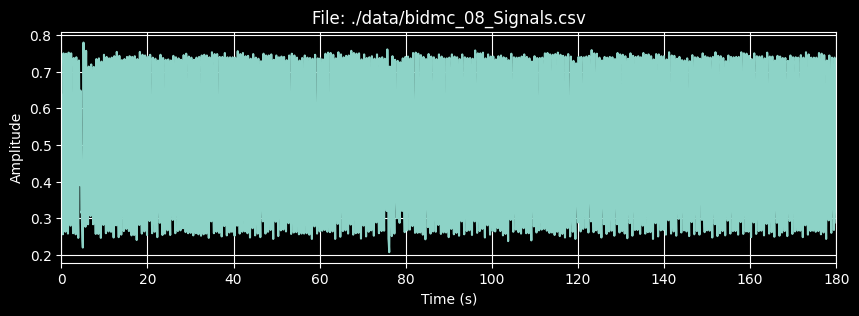

In [7]:
# Plot 180 seconds of the full signal
plt.figure(figsize = (10, 3))
plt.plot(t, ppg)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(f'File: {filename}')
plt.xlim(0, 180)
plt.grid()
plt.show()

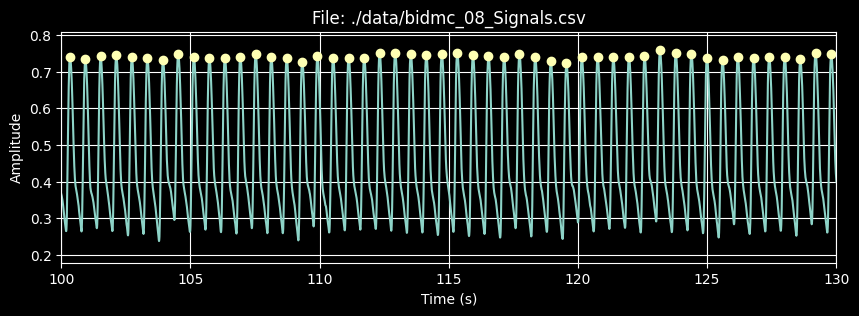

In [8]:
# Continue coding here ...
peaks, properties = find_peaks(ppg, height=0.5, distance=50)
# Plot the ppg signal and the peaks
plt.figure(figsize = (10, 3))
plt.plot(t, ppg)
plt.plot(t[peaks], ppg[peaks], 'o')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(f'File: {filename}')

# Zoom in from 100 to 130 seconds
plt.xlim(100, 130)

plt.grid()
plt.show()

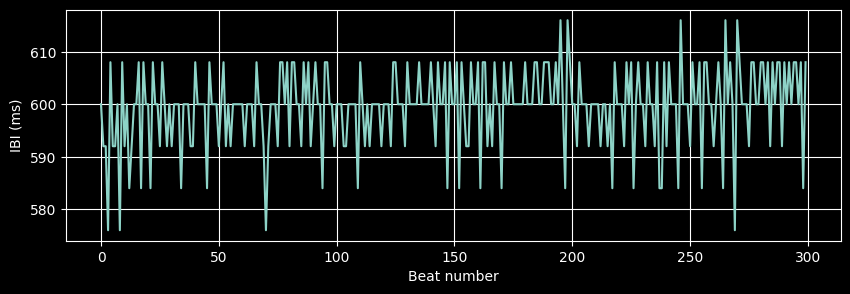

In [9]:
# Continue coding here ...
ppi = np.diff(peaks)*ts*1000 # in milliseconds

i = (ppi > 400) & (ppi < 800)
ppi = ppi[i]

ppi = ppi[10:310]

# Plot the IBI
plt.figure(figsize = (10, 3))
plt.plot(ppi)
plt.xlabel('Beat number')
plt.ylabel('IBI (ms)')
plt.grid()
plt.show()

In [10]:
# Continue coding here ...
x_std = np.std(ppi) # Standard deviation
x_rmssd = np.sqrt(np.mean(np.diff(ppi)**2)) # Root mean square of successive differences

# Calculate the average IBI
mean_ppi = np.mean(ppi)
print(f'Mean IBI: {mean_ppi:.2f} ms')

# Calculate the heart rate
hr = 60000/mean_ppi
print(f'Heart rate: {hr:.2f} bpm')

print(f'SDNN: {x_std:.2f}')
print(f'RMSSD: {x_rmssd:.2f}')

Mean IBI: 599.63 ms
Heart rate: 100.06 bpm
SDNN: 7.44
RMSSD: 11.66


**Interpretation (A2)**

**Patient info (from Fix.txt):** Age: 64 , Sex: F

1. **Was the mean heart rate (BPM) low or high?**

    My mean HR is 100 bpm → this is high.

2. **Was the mean PPI (ms) low or high?**

    My mean PPI is 599.63 ms → this is normal. (Remember: higher HR ↔ lower PPI)

3. **How much variation was there in PPI values (SDNN & RMSSD)?**

    SDNN =  7.44ms, RMSSD = 11.66 ms → variation is small.

4. **Was the variation low or high?**

    Based on SDNN/RMSSD, variability is low.

5. **Compare to normal values (lecture notes) and interpret recovery/stress.**

    Compared to normal values, this suggests: More stress for the patient and they have yet to recover.